<a href="https://colab.research.google.com/github/JeromeMberia/Autolib_electric_car_sharing_service_company/blob/main/Autolib_electric_car_sharing_service_company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('autolib_daily_events_postal_code (3).csv', delimiter=",")

# Checking the dataset

In [ ]:
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [ ]:
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [ ]:
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [ ]:
rows = df.shape[0]
columns = df.shape[1]
print(f'The dataset has {rows} rows and {columns} columns')

The dataset has 16085 rows and 13 columns


In [ ]:
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [ ]:
df.nunique()

Postal code               104
date                      156
n_daily_data_points        23
dayOfWeek                   7
day_type                    2
BlueCars_taken_sum        932
BlueCars_returned_sum     929
Utilib_taken_sum           48
Utilib_returned_sum        49
Utilib_14_taken_sum        92
Utilib_14_returned_sum     94
Slots_freed_sum           297
Slots_taken_sum           301
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [ ]:
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

# Tidying the Dataset

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

NameError: ignored

In [ ]:
df.columns

NameError: ignored

In [ ]:
# Renaming columns
df = df.rename(columns={"dayofweek": "day_of_week", 
                        "bluecars_taken_sum": "blue_cars_taken_sum", 
                        "bluecars_returned_sum": "blue_cars_returned_sum"})

In [ ]:
# drop colums
try:
  df = df.drop(['n_daily_data_points','utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'], axis=1)
except:
  print('Droped !')
print('*********************************')
print(df.columns)

In [ ]:
# Checking for Outliers
col = df.drop(['postal_code', 'date', 'day_of_week', 'day_type'], axis=1)

names = list(col.columns)
fig, axes = plt.subplots(1, 2 , figsize=(20,5))  

i = 0
for name in names:

  sns.boxplot(x=df[name], ax=axes[i])
  axes[i].set_title(f'Box plot of {name}', fontsize=20)
  axes[i].set_xlabel(name, fontsize=15)
  i+=1

plt.tight_layout()
plt.show()


In [ ]:
# Checking for Anomalies
  
blue_cars_returned_sum_Q1 = df['blue_cars_returned_sum'].quantile(.25)
blue_cars_returned_sum_Q3 = df['blue_cars_returned_sum'].quantile(.75)

iqr_bc_r_s = blue_cars_returned_sum_Q3 - blue_cars_returned_sum_Q1


blue_cars_taken_sum_Q1 = df['blue_cars_taken_sum'].quantile(.25)
blue_cars_taken_sum_Q3 = df['blue_cars_taken_sum'].quantile(.75)

iqr_bc_t_s = blue_cars_taken_sum_Q3 - blue_cars_taken_sum_Q1

print(f'The interquartile range of blue_cars_returned_sum is {iqr_bc_r_s}.')
print(f'The interquartile range of blue_cars_taken_sum is {iqr_bc_t_s}.')

In [ ]:
# Identifying the Missing Data
df.isnull().sum()

In [ ]:
# Identifying the Duplicate Data
df.duplicated().sum()

In [ ]:
df['date'] = pd.to_datetime(df['date'], format="%m/%d/%Y")

In [ ]:
df.dtypes

In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [ ]:
df.year.unique()

In [ ]:
df['month'] = pd.DatetimeIndex(df['date']).month

In [ ]:
df.dtypes

In [ ]:
df['month'] = df['month'].astype(int)

In [ ]:
df['year'] = df['year'].astype(int)

In [ ]:
df['day_of_week'].replace({0:'Monday',
                           1:'Tuesday',
                           2:'Wednesday',
                           3:'Thursday',
                           4:'Friday',
                           5:'Saturday',
                           6:'Sunday'},inplace=True)

In [ ]:
df.day_of_week.unique()

In [ ]:
df['month'].replace({1:'January',
                     2:'February', 
                     3:'March',
                     4:'April', 
                     5:'May', 
                     6:'June', 
                     7:'July', 
                     8:'August', 
                     9:'September', 
                     10:'October', 
                     11:'November', 
                     12:'December'},inplace=True)

In [ ]:
df.month.unique()

# Exploratory Analysis

## Univariate Analysis

In [ ]:
df.columns

Index(['postal_code', 'date', 'day_of_week', 'day_type', 'blue_cars_taken_sum',
       'blue_cars_returned_sum', 'year', 'month'],
      dtype='object')

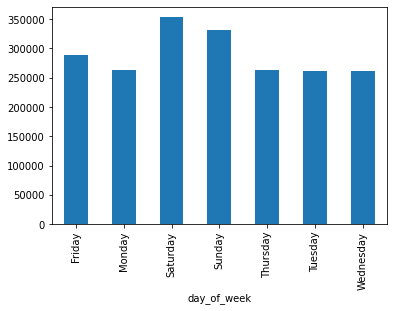

In [ ]:
df['blue_cars_taken_sum'].groupby(df['day_of_week']).sum().plot(kind="bar")

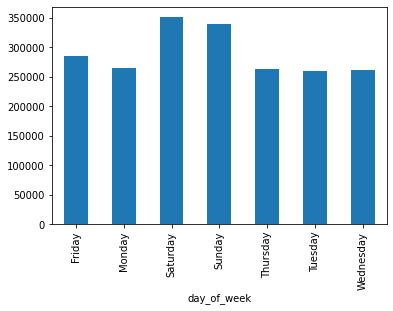

In [ ]:
df['blue_cars_returned_sum'].groupby(df['day_of_week']).sum().plot(kind="bar", )

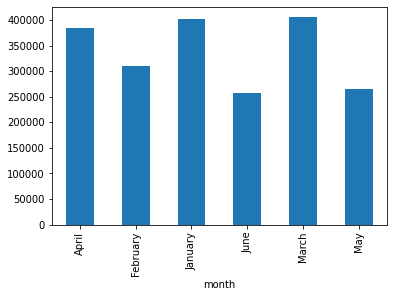

In [ ]:
df['blue_cars_taken_sum'].groupby(df['month']).sum().plot(kind="bar")

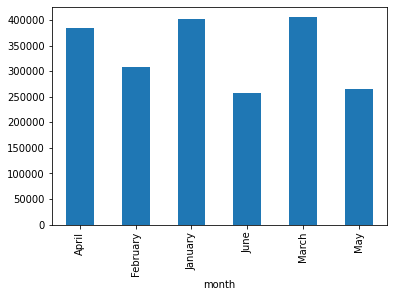

In [ ]:
df['blue_cars_returned_sum'].groupby(df['month']).sum().plot(kind="bar")

### Central Tendency

#### mean

##### Mean in a month

In [ ]:
df_m = df.groupby('month')

In [ ]:
# blue cars taken
df_m['blue_cars_taken_sum'].mean()

month
April       124.467679
February    120.368442
January     126.189045
June        131.380102
March       127.231083
May         127.436959
Name: blue_cars_taken_sum, dtype: float64

In [ ]:
# blue cars returned
df_m['blue_cars_returned_sum'].mean()

month
April       124.373303
February    120.267781
January     126.228795
June        131.513265
March       127.309262
May         127.285371
Name: blue_cars_returned_sum, dtype: float64

In [ ]:
df_d_o_w = df.groupby('day_of_week')

In [ ]:
df_d_o_w['blue_cars_taken_sum'].mean()

day_of_week
Friday       127.056803
Monday       111.159646
Saturday     156.124393
Sunday       146.071240
Thursday     116.052469
Tuesday      110.850614
Wednesday    115.453704
Name: blue_cars_taken_sum, dtype: float64

In [ ]:
df_d_o_w['blue_cars_returned_sum'].mean()

day_of_week
Friday       125.948481
Monday       111.545072
Saturday     155.081606
Sunday       148.986368
Thursday     115.944004
Tuesday      110.228523
Wednesday    114.935185
Name: blue_cars_returned_sum, dtype: float64

#### median

In [ ]:
df_m['blue_cars_taken_sum'].median()

month
April       47
February    44
January     46
June        47
March       45
May         47
Name: blue_cars_taken_sum, dtype: int64

In [ ]:
df_m['blue_cars_returned_sum'].median()

month
April       46.0
February    44.0
January     46.0
June        47.5
March       45.0
May         48.0
Name: blue_cars_returned_sum, dtype: float64

#### mode

In [ ]:
df['blue_cars_taken_sum'].mode()

0    12
dtype: int64

In [ ]:
df['blue_cars_returned_sum'].mode()

0    13
dtype: int64

### Dispersion

#### Standard Deviation

In [ ]:
df['blue_cars_returned_sum'].std()

<bound method Series.std of 0        103
1         94
2        139
3        104
4        117
        ... 
16080     10
16081     19
16082     35
16083     14
16084      2
Name: blue_cars_returned_sum, Length: 16085, dtype: int64>

In [ ]:
df['blue_cars_taken_sum'].std()

<bound method Series.std of 0        110
1         98
2        138
3        104
4        114
        ... 
16080     15
16081     19
16082     33
16083     11
16084      2
Name: blue_cars_taken_sum, Length: 16085, dtype: int64>

#### Variance

In [ ]:
df['blue_cars_returned_sum'].var()

<bound method Series.var of 0        103
1         94
2        139
3        104
4        117
        ... 
16080     10
16081     19
16082     35
16083     14
16084      2
Name: blue_cars_returned_sum, Length: 16085, dtype: int64>

In [ ]:
df['blue_cars_taken_sum'].var()

<bound method Series.var of 0        110
1         98
2        138
3        104
4        114
        ... 
16080     15
16081     19
16082     33
16083     11
16084      2
Name: blue_cars_taken_sum, Length: 16085, dtype: int64>

#### Range

In [ ]:
max = df['blue_cars_returned_sum'].max()
min = df['blue_cars_returned_sum'].min()
range = max-min
range

1332

In [ ]:
max = df['blue_cars_taken_sum'].max()
min = df['blue_cars_taken_sum'].min()
range = max-min
range

1352

#### Quantiles

In [ ]:
df['blue_cars_taken_sum'].quantile([0.25,0.5,0.75])

0.25     20.0
0.50     46.0
0.75    135.0
Name: blue_cars_taken_sum, dtype: float64

In [ ]:
df['blue_cars_returned_sum'].quantile([0.25,0.5,0.75])

0.25     20.0
0.50     46.0
0.75    135.0
Name: blue_cars_returned_sum, dtype: float64

#### Summary statistics

In [ ]:
df.blue_cars_returned_sum.describe()

count    16085.000000
mean       125.912714
std        185.501535
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1332.000000
Name: blue_cars_returned_sum, dtype: float64

In [ ]:
df.blue_cars_taken_sum.describe()

count    16085.000000
mean       125.926951
std        185.426579
min          0.000000
25%         20.000000
50%         46.000000
75%        135.000000
max       1352.000000
Name: blue_cars_taken_sum, dtype: float64

### Descriptions of the distribution curve

#### Skewness

In [ ]:
df.blue_cars_returned_sum.skew()

2.412084978838923

In [ ]:
df.blue_cars_taken_sum.skew()

2.4063548974959086

#### Kurtosis

In [ ]:
df.blue_cars_returned_sum.kurt()

6.1862880957582345

In [ ]:
df.blue_cars_taken_sum.kurt()

6.172692305510042

### Bivariate Analysis

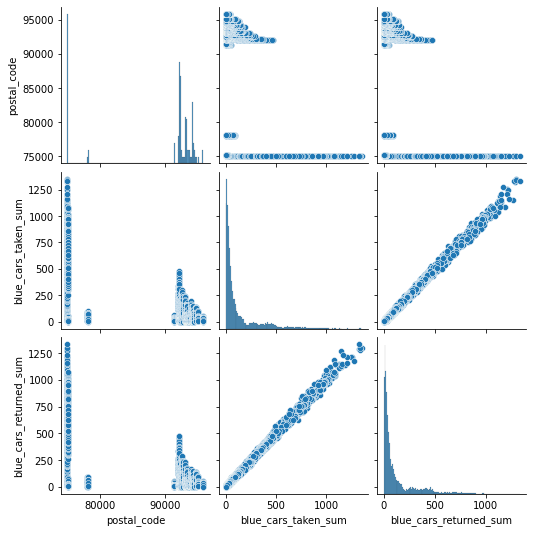

In [ ]:
df_1 = df.drop(['year'], axis=1)
sns.pairplot(df_1)
plt.show()

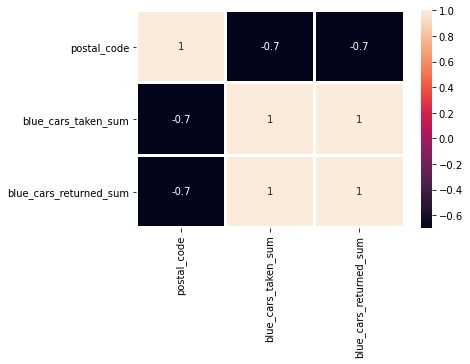

In [ ]:
sns.heatmap(df_1.corr(),annot=True, linecolor='white', linewidths=2, )
plt.show()

# Hypothesis Test

Define null and research hypothesis, test statistic, level of significance and decision rule
Distinguish between Type I and Type II errors and discuss the implications of each
Explain the difference between one and two sided tests of hypothesis
Estimate and interpret p-values
Explain the relationship between confidence interval estimates and p-values in drawing inferences
Differentiate hypothesis testing procedures based on type of outcome variable and number of sample

> Finding whether loction_a(**postal_code 75015**) has **more** car been pickup than location_b(**postal_code 75017**)

In [ ]:
location_a = df[df['postal_code']==75015]
location_b = df[df['postal_code']==75017]

In [ ]:
location_a.shape

(156, 8)

In [ ]:
location_b.shape

(156, 8)

## The Null Hypothesis

In [ ]:
l_a_m = location_a['blue_cars_taken_sum'].mean()
l_a_m

896.9551282051282

## The Alternative Hypothesis

In [ ]:
l_b_m = location_b['blue_cars_taken_sum'].mean()
l_b_m

734.4935897435897

## The Significance Level

> The significance level is 0.05 because this hypothesis is a one tail test.
>
> a = 0.05

## Test Statistic

> It will be z-statistic not the t-statistic because the sample size is above 30.

In [ ]:
from scipy import stats
from statsmodels.stats import weightstats as stests

ztest , p_val = stests.ztest(location_a['blue_cars_taken_sum'], location_b['blue_cars_taken_sum'], value=0, alternative='two-sided')
print(float(p_val))

if p_val < 0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

5.034874610502195e-19
reject null hypothesis
